[//]: # (This is a comment, to download pdf using latex option set this cell to raw and use prepend % to comment out in latex fashion)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tljstewart/machine-learning/blob/main/svm/svm.ipynb)



# SVM

In [1]:
import numpy as np
#version checks
import sys
print(sys.executable)
print(sys.version)

class SVM:
    
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        y_ = np.where(y <= 0 , -1, 1)
        n_samples, n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
        
    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

C:\Users\tljst\AppData\Local\conda\conda\envs\ml39\python.exe
3.9.2 | packaged by conda-forge | (default, Feb 21 2021, 04:59:43) [MSC v.1916 64 bit (AMD64)]


# SVM TEST


[0.58977016 0.17946483] -0.1520000000000001


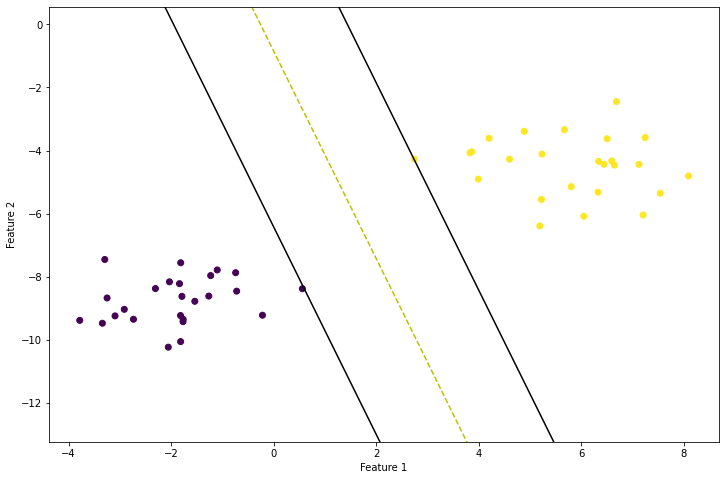

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

#from svm import SVM

#for 3d X, y = datasets.make_blobs(n_samples=50, n_features=3, centers=3, cluster_std=1.05, random_state=40)
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X,y)

print(clf.w, clf.b)

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    
    fig = plt.figure(figsize=(12,8))
    #for 3d ax = fig.add_subplot(1,1,1, projection='3d')
    #for 3d plt.scatter(X[:,0], X[:,1], X[:,2], marker='o', c=y)
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o', c=y)
    
    
    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

    plt.show()

visualize_svm()